# Laboratorul 7

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Exercițiul 1

Care este **frecvența de eșantionare** a semnalului de trafic? (revedeți secțiunea pentru detalii despre cum a fost achiziționat acesta)

In [2]:
# traficul e înregistrat la o ora =>
perioada_de_esantionare_secunde = 3600  # 1 ora = 3600 secunde
frecventa_de_esantionare_hz = 1 / perioada_de_esantionare_secunde

print(frecventa_de_esantionare_hz)

0.0002777777777777778


## Exercițiul 2

Ce **interval de timp** acoperă eșantioanele din fișier?

In [3]:

numar_esantioane = 18288  # numărul total de eșantioane
ore_per_esantion = 1  # frecvența de eșantionare este o dată pe oră

zile_acoperite = numar_esantioane * ore_per_esantion / 24
saptamani_acoperite = zile_acoperite / 7
luni_acoperite = zile_acoperite / 30

print(f"Zile acoperite: {zile_acoperite:.2f} zile")
print(f"Săptămâni acoperite: {saptamani_acoperite:.2f} săptămâni")
print(f"Luni acoperite: {luni_acoperite:.2f} luni")


Zile acoperite: 762.00 zile
Săptămâni acoperite: 108.86 săptămâni
Luni acoperite: 25.40 luni


## Exercițiul 3

Presupunând că semnalul a fost eșantionat **corect** (fără aliere) și **optim**, care este **frecvența maximă** prezentă în semnal?

In [4]:
# nu avem aliere => frecventa de esantionare = 2 * frecventa maxima
print(frecventa_de_esantionare_hz/2)

0.0001388888888888889


## Exercițiul 4

Utilizați funcția `np.fft.rfft(x)` pentru a calcula **transformata Fourier** a semnalului și afișați grafic **modulul transformatei**.

Deoarece valorile pe care le veți calcula sunt în Hz, este important să definiți corect frecvența de eșantionare (astfel încât valorile de frecvențe pe care le obțineți utilizând ultima secvență de cod din ghidul Python din ]îndrumar să aibă o interpretare corectă din punct de vedere fizic).

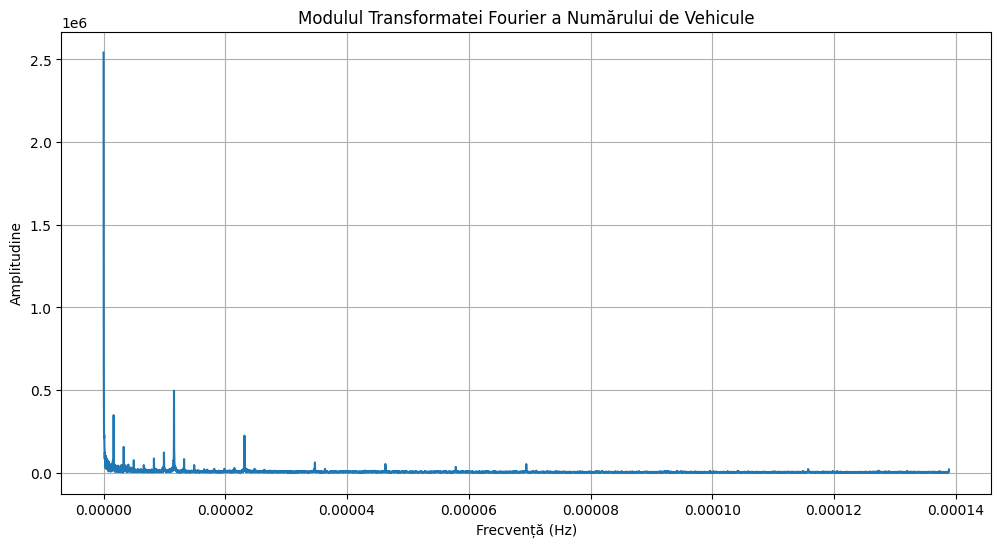

In [31]:
file_path = 'traffic_1.csv'

vehicle_counts = np.genfromtxt(file_path, delimiter=',', skip_header=1, usecols=[2])

fft_result = np.fft.rfft(vehicle_counts)

# Calcularea frecvențelor corespunzătoare fiecărui punct din transformata Fourier
# Frecvența de eșantionare este 1/3600 Hz (dată din oră în oră)

n = len(vehicle_counts)
frequencies = np.fft.rfftfreq(n, d=1/frecventa_de_esantionare_hz)

# Vizualizarea graficului modulului transformatei Fourier
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft_result))
plt.title('Modulul Transformatei Fourier a Numărului de Vehicule')
plt.xlabel('Frecvență (Hz)')
plt.ylabel('Amplitudine')
plt.grid(True)
plt.show()

## Exercițiul 5

Prezintă acest semnal o **componentă continuă**? Dacă da, eliminați-o și afișați semnalul rezultat. Dacă nu, specificați cum ați determinat acest fapt.

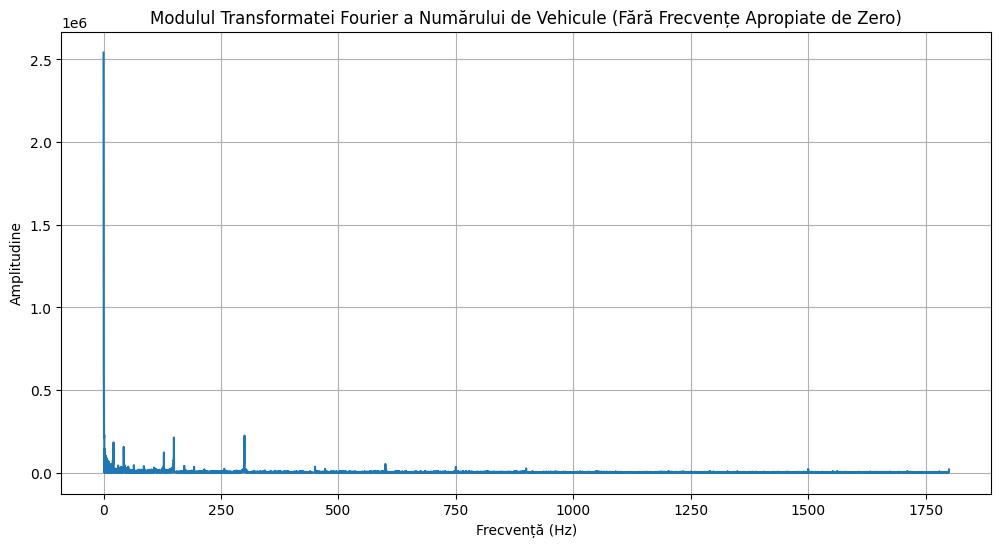

In [25]:
# da, are componenta continua din cauza ca avem o valoare semnificativa in jurul valorii 0, am incercat sa o elimin
# cu un filtru trece jos artificial 
epsilon = 1e-2  


adjusted_fft_result = np.fft.rfft(vehicle_counts)
indices_to_remove = np.where(frequencies < epsilon)

adjusted_fft_result[indices_to_remove] = 0

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(adjusted_fft_result))
plt.title('Modulul Transformatei Fourier a Numărului de Vehicule (Fără Frecvențe Apropiate de Zero)')
plt.xlabel('Frecvență (Hz)')
plt.ylabel('Amplitudine')
plt.grid(True)
plt.show()


## Exercițiul 6

Care sunt frecvențele principale conținute în semnal, așa cum apar ele în transformata Fourier? Mai exact, determinați **primele 4 cele mai mari valori** ale modulului transformatei și specificați căror frecvențe (în Hz) le corespund. Căror fenomene periodice din semnal se asociază fiecare?

In [ ]:
0.000107
0.000112
0.000129
0.000138


## Exercițiul 7

Începând de la un eșantion ales de voi (după cel al 1000-lea), reprezentați, pe un grafic separat, **o lună de trafic**. Alegeți eșantionul de start astfel încât reprezentarea să înceapă într-o **zi de luni**.

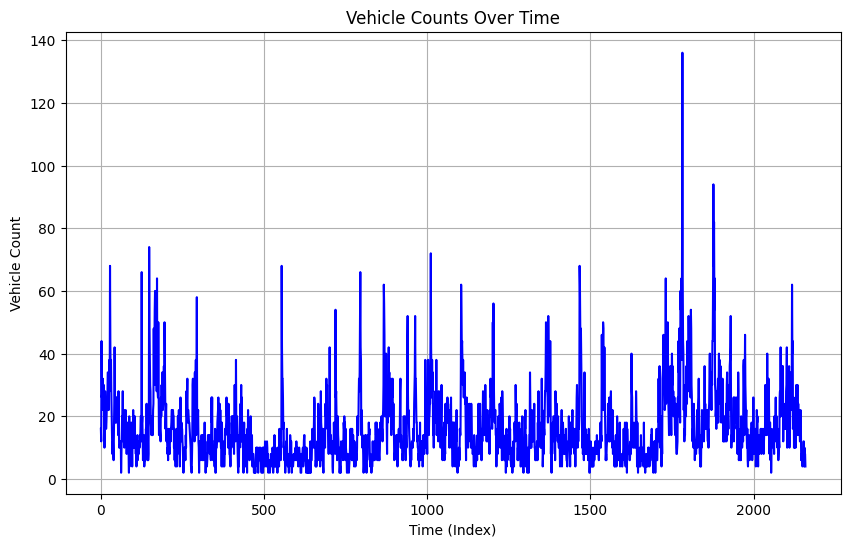

In [36]:
try:
    date_strings = np.genfromtxt(file_path, delimiter=',', skip_header=1, usecols=[1], dtype=str)
    dates = [datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S') for date_str in date_strings]
    index = 1000 
    first_monday_after_1000th = None
    while index < len(dates):
        if dates[index].weekday() == 0:  # 0 reprezintă ziua de luni
            first_monday_after_1000th_index = index
            break
        index += 1

    first_monday_after_1000th
except Exception as e:
    error_message = str(e)

error_message if 'first_monday_after_1000th' not in locals() else first_monday_after_1000th_index

# dupa mi am seama ca ar trb sa ma uit analogic/analitic
# si astfel as alege indexul 1032
plt.figure(figsize=(10, 6))
plt.plot(vehicle_counts[1000+30*24:1000+ 2*60*24], color='blue')
plt.title('Vehicle Counts Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Vehicle Count')
plt.grid(True)
plt.show()



## Exercițiul 8

Nu se cunoaște data la care a început măsurarea acestui semnal. Concepeți o **metodă** (descrieți în cuvinte) prin care să determinați, doar analizând semnalul în timp, această dată. Comentați ce neajunsuri ar putea avea soluția propusă și care sunt factorii de care depinde acuratețea ei.